In [2]:
%matplotlib inline


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
import matplotlib.pyplot as plt


In [4]:
train_path = '../data'  # adjust if needed

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    train_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    train_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 240 images belonging to 6 classes.
Found 59 images belonging to 6 classes.


Found 59 images belonging to 6 classes.


In [15]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  # freeze pretrained layers


In [16]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(6, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)


In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 64, 64,    │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 64, 64,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 64, 64,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 64, 64,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 64, 64,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 64, 64,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 65, 65,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 32, 32,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 32, 32,    │      2,304 │ block_1_depthwis

 Total params: 2,422,726 (9.24 MB)

 Trainable params: 164,742 (643.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [18]:
history = model.fit(train_gen, validation_data=val_gen, epochs=10)


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 640ms/step - accuracy: 0.2828 - loss: 2.0755 - val_accuracy: 0.5085 - val_loss: 1.2769
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 449ms/step - accuracy: 0.5339 - loss: 1.1919 - val_accuracy: 0.5763 - val_loss: 1.1114
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 399ms/step - accuracy: 0.6761 - loss: 0.8760 - val_accuracy: 0.6780 - val_loss: 0.9859
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 392ms/step - accuracy: 0.7801 - loss: 0.6145 - val_accuracy: 0.6102 - val_loss: 0.9970
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 420ms/step - accuracy: 0.8706 - loss: 0.4656 - val_accuracy: 0.6441 - val_loss: 0.9260
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 394ms/step - accuracy: 0.8391 - loss: 0.4309 - val_accuracy: 0.6780 - val_loss: 0.8837
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 423ms/step - accuracy: 0.8875 - loss: 0.3657 - val_accuracy: 0.6610 - val_loss: 1.0660
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 396ms/step - accuracy: 0.8975 - loss: 0.2916 - val_accuracy: 0.6441 - val_loss:

In [19]:
model.save('../model/waste_classifier_model.h5')


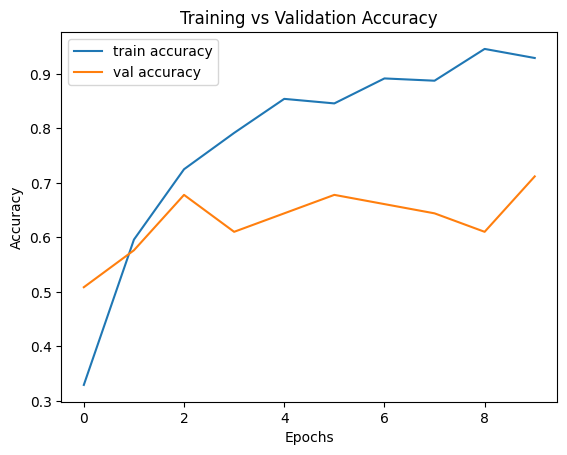

In [25]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()


In [21]:
# Step 1: Unfreeze base model layers
base_model.trainable = True

# Step 2: Compile with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 3: Fine-tune the model
model.fit(train_gen, validation_data=val_gen, epochs=5)


Epoch 1/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.4505 - loss: 1.9405 - val_accuracy: 0.6780 - val_loss: 0.9202
Epoch 2/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.4576 - loss: 1.7744 - val_accuracy: 0.6610 - val_loss: 1.0544
Epoch 3/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.4726 - loss: 1.7670 - val_accuracy: 0.6441 - val_loss: 1.1353
Epoch 4/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5368 - loss: 1.6158 - val_accuracy: 0.6949 - val_loss: 0.9554
Epoch 5/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.5622 - loss: 1.4592 - val_accuracy: 0.6949 - val_loss: 0.9466


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
Class names: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
Predictions: [5 2 1 4 4 5 0 0 0 3]
True Labels: [0 0 0 0 0 0 0 0 0 1]
Confusion Matrix:
 [[3 1 1 0 2 2]
 [1 4 0 1 1 3]
 [2 3 2 0 1 2]
 [3 2 0 1 1 3]
 [3 2 1 1 2 1]
 [1 1 2 1 1 4]]


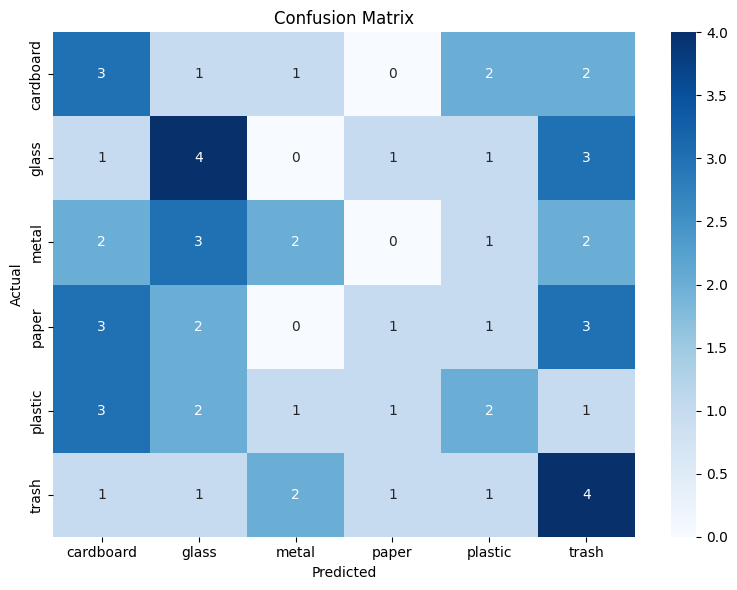

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict
Y_pred = model.predict(val_gen, steps=len(val_gen), verbose=1)
y_pred = np.argmax(Y_pred, axis=1)
y_true = val_gen.classes[:len(y_pred)]
class_names = list(val_gen.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Debug Info
print("Class names:", class_names)
print("Predictions:", y_pred[:10])
print("True Labels:", y_true[:10])
print("Confusion Matrix:\n", cm)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig("confusion_matrix.png")  # Optional
plt.show()


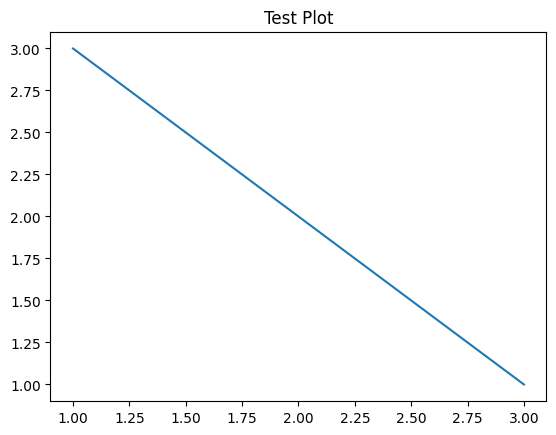

✅ Plot displayed


In [26]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3], [3, 2, 1])
plt.title("Test Plot")
plt.savefig("test_plot.png")  # Save it anyway
plt.show()
print("✅ Plot displayed")
